# Trabajo Practico FINAL
Participantes:
Alexis Aramis Torchinsky

## Importacion, Inicializacion y separacion de los datasets
### Creacion de un conjunto de datasets Normalizados

In [1]:
### 1) Construya 2 datasets, uno con los datos originales y otro con los datos escalados y/o normalizados. 
### Divida ambos datasets en conjuntos de entrenamiento y de validación.
#Imports
import numpy as np
import pandas as pd
import sklearn.model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

# carga del dataload orginal de Wine recognition dataset
wine=load_wine()
etiquetas=wine.target
#print(etiquetas)
originalData = pd.DataFrame(wine.data)
print("Original Wine Data")
print(wine.feature_names)
print(wine.target_names)
print(originalData)
print(originalData.shape)
print(originalData.describe())
#Conjuntos de Entrenamiento y Validacion de Datos Originales
OrigD_X_train, OrigD_X_test, OrigD_y_train, OrigD_y_test=sklearn.model_selection.train_test_split(
        originalData,
        range(len(originalData)),
        test_size=0.2,
        shuffle=True)
TagOrigD_y_train=etiquetas[OrigD_y_train]
TagOrigD_y_test=etiquetas[OrigD_y_test]
#print(TagOrigD_y_train)
#print(TagOrigD_y_test)
#Conjuntos de Entrenamiento y Validacion de Datos Normalizados
sc_X=StandardScaler()
normalizedData=sc_X.fit_transform(originalData)
normalizedData=sc_X.fit_transform(originalData)
print("Normalized Wine data")
print(normalizedData)
NormD_X_train, NormD_X_test, NormD_y_train, NormD_y_test=sklearn.model_selection.train_test_split(
        normalizedData,
        range(len(normalizedData)),
        test_size=0.2,
        shuffle=True)
TagNormD_y_train=etiquetas[NormD_y_train]
TagNormD_y_test=etiquetas[NormD_y_test]
#print(TagNormD_y_train)
#print(TagNormD_y_test)

Original Wine Data
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']
        0     1     2     3      4     5     6     7     8      9     10  \
0    14.23  1.71  2.43  15.6  127.0  2.80  3.06  0.28  2.29   5.64  1.04   
1    13.20  1.78  2.14  11.2  100.0  2.65  2.76  0.26  1.28   4.38  1.05   
2    13.16  2.36  2.67  18.6  101.0  2.80  3.24  0.30  2.81   5.68  1.03   
3    14.37  1.95  2.50  16.8  113.0  3.85  3.49  0.24  2.18   7.80  0.86   
4    13.24  2.59  2.87  21.0  118.0  2.80  2.69  0.39  1.82   4.32  1.04   
..     ...   ...   ...   ...    ...   ...   ...   ...   ...    ...   ...   
173  13.71  5.65  2.45  20.5   95.0  1.68  0.61  0.52  1.06   7.70  0.64   
174  13.40  3.91  2.48  23.0  102.0  1.80  0.75  0.43  1.41   7.30  0.70   
175  13.27  4.28  2.26  20.0  120.0  1.59  0.69  0.43  

# Analisis por metodo KNN
Elija un valor de K y aplique el algoritmo de KNN en ambos datasets. 

Evalúe la precisión en ambos casos sobre el conjunto de validación correspondiente. 

Analice brevemente los resultados obtenidos

In [5]:
#Imports
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score

### Setup de KNN
import math
n_neighbors = int(math.sqrt(len(OrigD_y_test))) #15
#n_neighbors=15
print(f"neighbors calculados como Raiz de la longitud del dataset: {n_neighbors}")
### Aplicamos el modelo KNN para el DS Original de training
print("=========================================================")
print("-------- Analisis por KNN sobre datos originales --------")
for weights in ['uniform', 'distance']:
    # Creamos una instancia del clasificador de vecinos más cercanos y le pasamos los datos mediante fit().
    # base sobre dataset Original de TRainig(OTR)
    classifierOTR = neighbors.KNeighborsClassifier(n_neighbors, weights=weights, metric='euclidean')
    classifierOTR.fit(OrigD_X_train, TagOrigD_y_train)
    
    predictOTR = classifierOTR.predict(OrigD_X_test)
    print(f"Presicion por {weights}: {accuracy_score(TagOrigD_y_test, predictOTR)}")
    #print(TagOrigD_y_test)
    #print(predictOTR)
print("=========================================================")


### Aplicamos el modelo KNN para el DS Normalizados de training
print("=========================================================")
print("-------- Analisis por KNN sobre datos NORMALIZADOS --------")
for weights in ['uniform', 'distance']:
    # Creamos una instancia del clasificador de vecinos más cercanos y le pasamos los datos mediante fit().
    # base sobre dataset Normalizado de TRainig(NTR)
    classifierNTR = neighbors.KNeighborsClassifier(n_neighbors, weights=weights, metric='euclidean')
    classifierNTR.fit(NormD_X_train, TagNormD_y_train)
    
    predictNTR = classifierNTR.predict(NormD_X_test)
    print(f"Presicion por {weights}: {accuracy_score(TagNormD_y_test, predictNTR)}")
print("=========================================================")


neighbors calculados como Raiz de la longitud del dataset: 6
-------- Analisis por KNN sobre datos originales --------
Presicion por uniform: 0.7222222222222222
Presicion por distance: 0.8055555555555556
-------- Analisis por KNN sobre datos NORMALIZADOS --------
Presicion por uniform: 0.9166666666666666
Presicion por distance: 0.9166666666666666


### KNN: Analisis de los resultados
Luego de varias ejecuciones depurando el kernel todas las presiciones obtenidas con los datos normalizados se encuentran por encima del 91%, mientras que los modelos entrenados sobre los datos originales sin preprosesar nunca super el 75% de la presicion.

Asi mismo, en ambos entrenamientos(datos originales y datos normalizados) se ve una mejora consistente de la presicion(3 puntos para datos normalizados, 6 a 9 puntos porcentuales para datos originales) cuando se utiliza el pesaje con el metodo de "inversa de la distancia" versus el uniforme.

Ultima observacion: La varianza en la presicion de las predicciones es muy inconsistente para los set de datos de test originales, a diferencia de los datos normalizados. Ademas para los datos normalizados por metodo de "inversa de la distancia" la prediccion en la gran mayoria de los casos siempre esta en 91,4% 


# Analisis por Arboles de desicion

Elija un valor de max_depth y aplique el algoritmo de Árboles de Decisión en ambos datasets. 

Evalúe la precisión en ambos casos. sobre el conjunto de validación correspondiente. Analice brevemente los resultados obtenidos

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

arbolOTR=DecisionTreeClassifier(max_depth=5)
arbolOTR.fit(OrigD_X_train, TagOrigD_y_train)

print(f"Score del Arbol sobre datos Originales de entrenamiento: {arbolOTR.score(OrigD_X_train, TagOrigD_y_train)}")

print(f"Score del Arbol sobre datos Originales de test: {arbolOTR.score(OrigD_X_test, TagOrigD_y_test)}")


Score del Arbol sobre datos Originales de entrenamiento: 1.0
Score del Arbol sobre datos Originales de test: 0.9444444444444444


In [22]:
arbolNTR=DecisionTreeClassifier(max_depth=3)
arbolNTR.fit(NormD_X_train, TagNormD_y_train)

print(f"Score del Arbol sobre datos Normalizados de entrenamiento: {arbolNTR.score(NormD_X_train, TagNormD_y_train)}")

print(f"Score del Arbol sobre datos Normalizados de test: {arbolNTR.score(NormD_X_test, TagNormD_y_test)}")


Score del Arbol sobre datos Normalizados de entrenamiento: 0.9859154929577465
Score del Arbol sobre datos Normalizados de test: 0.8333333333333334


### Arboles de Desicion: Analisis de los resultados
Luego de varias ejecuciones depurando el kernel todas las presiciones obtenidas para el dataset de validacion tanto con los datos originales como los normalizados se mantienen en un 83,3%. El mismo nivel de presicion se da tanto para una profundidad de 3 y de 5 niveles. Con lo que se podria concluir que es analisis por arboles de desicion para este modelo es sumamente consistente.
Tambien ya se visualiza que para este dataset el modelo KNN obtiene mejor score que los Arboles aunque menos consistente.


# Analisis por PCA

Aplique el algoritmo PCA a los datos escalados y/o normalizados para reducir su dimensionalidad a 2, y grafique el conjunto resultante.

(178, 13)
(178, 2)


Text(0, 0.5, 'Componente pca 2')

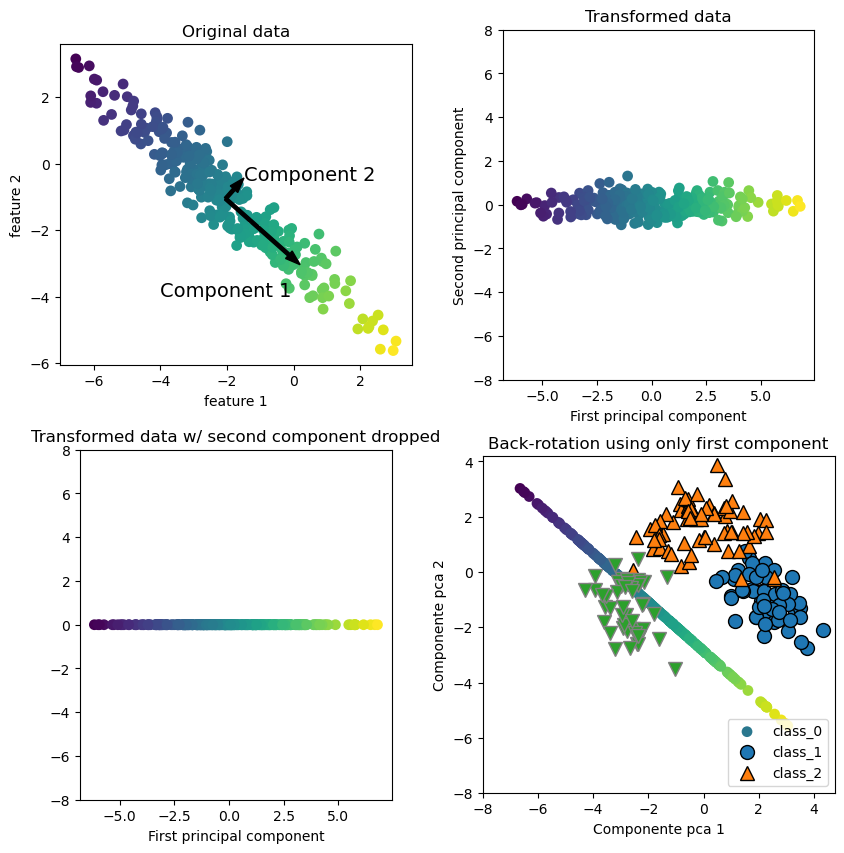

In [23]:
import mglearn
from sklearn.decomposition import PCA
mglearn.plots.plot_pca_illustration()

pca=PCA(n_components=2)
pca.fit(normalizedData)

transformada=pca.transform(normalizedData)
print(normalizedData.shape)
print(transformada.shape)
#print(transformada)

mglearn.discrete_scatter(transformada[:,0], transformada[:,1], etiquetas)
plt.legend(wine.target_names, loc='lower right')
plt.xlabel('Componente pca 1')
plt.ylabel('Componente pca 2')

El Score para analisis por KMeans para al dataset reducido es de: 0.8961671105205941


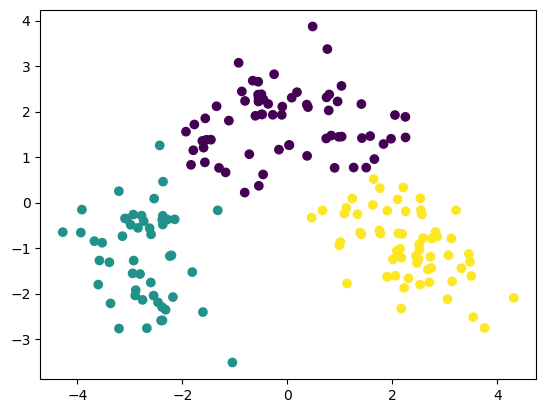

In [24]:
### Aplicacion de KMeans a la transformada por PCA
from sklearn.cluster import KMeans
from sklearn import metrics
k_means = KMeans(n_clusters=3, max_iter=2000) 
k_means.fit(transformada)
predicciones=k_means.predict(transformada)
score=metrics.adjusted_rand_score(etiquetas, predicciones) 
print(f"El Score para analisis por KMeans para al dataset reducido es de: {score}")
plt.scatter(transformada[:, 0], transformada[:, 1], c=predicciones)
plt.show()

## Analisis de datos reducidos con etiquetas por KNN
Asigne las etiquetas correspondientes a los datos de dimensionalidad reducida obtenidos en 4), y divida dichos datos en conjuntos de entrenamiento y validación. 
Elija un valor de K y aplique el algoritmo de KNN. 
Evalúe la precisión sobre el conjunto de validación. 
Analice brevemente los resultados obtenidos

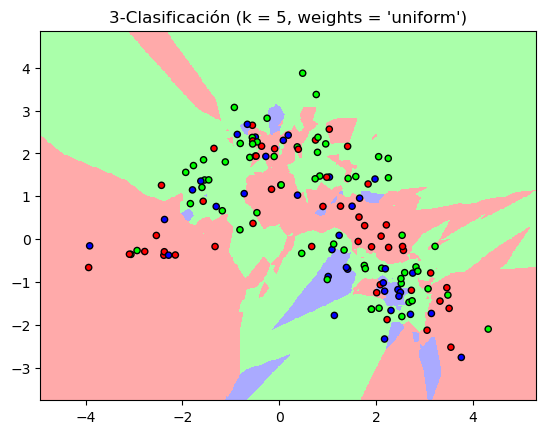

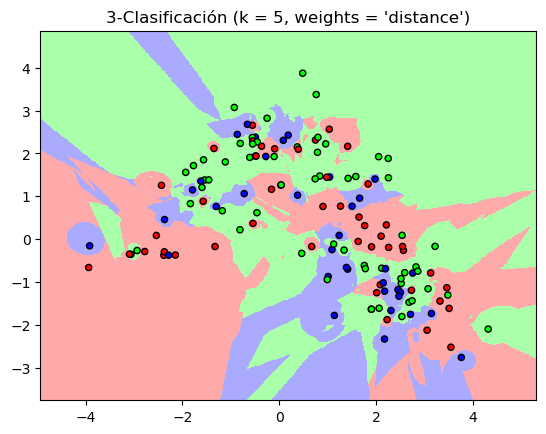

In [25]:
### Asigne las etiquetas correspondientes a los datos de dimensionalidad reducida obtenidos en 4), 
### y divida dichos datos en conjuntos de entrenamiento y validación. 
import matplotlib.pyplot as pltTTR
from sklearn import neighbors as neighborsTR
h = .02

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

TransD_X_train, TransD_X_test, TransD_y_train, TransD_y_test=sklearn.model_selection.train_test_split(
        transformada,
        range(len(transformada)),
        test_size=0.2,
        shuffle=False)

n_neighbors = 5
for weights in ['uniform', 'distance']:
    clfTTR = neighborsTR.KNeighborsClassifier(n_neighbors, weights=weights)
    clfTTR.fit(TransD_X_train, TagNormD_y_train)

    x_min, x_max =  TransD_X_train[:, 0].min() - 1, TransD_X_train[:, 0].max() + 1
    y_min, y_max =  TransD_X_train[:, 1].min() - 1, TransD_X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clfTTR.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    pltTTR.figure()
    pltTTR.pcolormesh(xx, yy, Z, shading='auto', cmap=cmap_light)

    # Ploteo los datos de entrenamiento
    pltTTR.scatter(TransD_X_train[:, 0], TransD_X_train[:, 1], c=TagNormD_y_train, cmap=cmap_bold, edgecolor='k', s=20)
    pltTTR.xlim(xx.min(), xx.max())
    pltTTR.ylim(yy.min(), yy.max())
    pltTTR.title("3-Clasificación (k = %i, weights = '%s')" % (n_neighbors, weights))

pltTTR.show()


(36, 2)
Presicion por uniform: 0.5833333333333334
Presicion por distance: 1.0


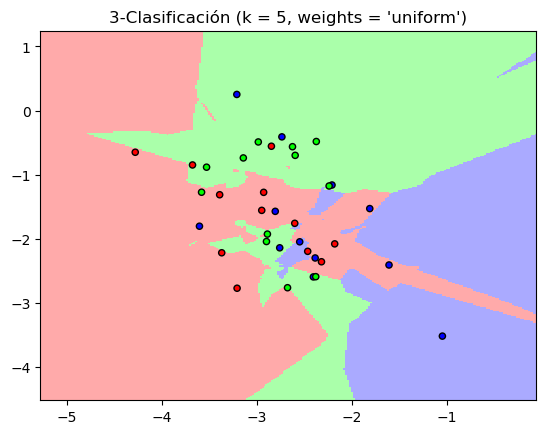

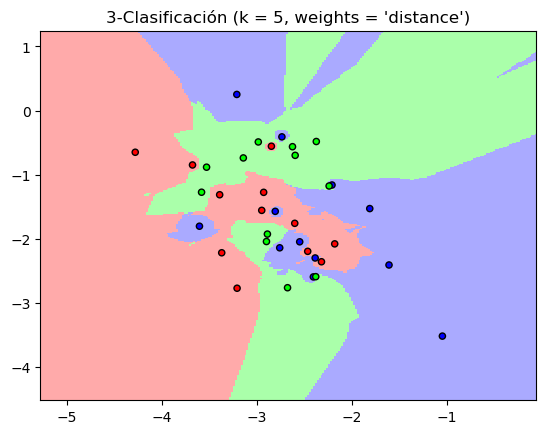

In [27]:
### Elija un valor de K y aplique el algoritmo de KNN. 
### Evalúe la precisión sobre el conjunto de validación. 
### Analice brevemente los resultados obtenidos
import matplotlib.pyplot as pltTTRVal
from sklearn import neighbors as neighborsTRVal
n_neighbors = 5
print(TransD_X_test.shape)
for weights in ['uniform', 'distance']:
    clfTTRVal = neighborsTRVal.KNeighborsClassifier(n_neighbors, weights=weights)
    clfTTRVal.fit(TransD_X_test, TagNormD_y_test)

    x_min, x_max = TransD_X_test[:, 0].min() - 1, TransD_X_test[:, 0].max() + 1
    y_min, y_max = TransD_X_test[:, 1].min() - 1, TransD_X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clfTTRVal.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    pltTTRVal.figure()
    pltTTRVal.pcolormesh(xx, yy, Z, shading='auto', cmap=cmap_light)

    pltTTRVal.scatter(TransD_X_test[:, 0], TransD_X_test[:, 1], c=TagNormD_y_test, cmap=cmap_bold, edgecolor='k', s=20)
    pltTTRVal.xlim(xx.min(), xx.max())
    pltTTRVal.ylim(yy.min(), yy.max())
    pltTTRVal.title("3-Clasificación (k = %i, weights = '%s')" % (n_neighbors, weights))
    predictTTRVal = clfTTRVal.predict(TransD_X_test)
    print(f"Presicion por {weights}: {accuracy_score(TagNormD_y_test, predictTTRVal)}")
pltTTRVal.show()

### KNN con Datos reducidos: Analisis de los resultados
La precision sobre datos de validacion es del 100% luego de refrescar el kernel y repetir el ejercicio varias veces tanto para K=3 como para K=5. Considerando la reduccion de features, vemos que para nuestro entrenamiento se mantiene consistente una presicion perfecta en las predicciones sobre los datos de validacion
